<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1: Síntesis de señales
#### Nombre y Apellido: Matías Galperin

# Introducción Teórica

El análisis y procesamiento de señales es una rama fundamental en la ingeniería electrónica, particularmente en el diseño y estudio de sistemas de comunicación, control y procesamiento de datos. Las señales, en su forma más básica, pueden ser representadas como funciones matemáticas que varían con el tiempo. Estas pueden ser de diferentes tipos: continuas, discretas, periódicas o no periódicas, y en este trabajo nos centramos en señales sinusoidales, cuadradas y pulsos rectangulares.

**Modulación**
Las señales sinusoidales son las más comunes en sistemas de comunicaciones, ya que representan ondas puras de frecuencia constante, como las utilizadas en radio, televisión y transmisión de datos. La modulación en amplitud (AM), por ejemplo, es un proceso donde la amplitud de una señal portadora se modifica en función de la señal de información, como se observa en la señal modulada en amplitud de este trabajo.

**Ortogonalidad**
El concepto de ortogonalidad es clave en el procesamiento de señales. Dos señales son ortogonales si su producto interno sobre un intervalo de tiempo es cero. Esto significa que no comparten componentes de frecuencia, lo que es útil, por ejemplo, en la multiplexación de señales o en sistemas de comunicación como el OFDM (Orthogonal Frequency Division Multiplexing). Dos funciones son ortogonales cuando su producto escalar es igual a cero.

**Autocorrelación y correlación**
La autocorrelación es una técnica fundamental para analizar la similitud de una señal consigo misma en diferentes momentos del tiempo. Es usada, entre otras cosas, para estimar la periodicidad de una señal y para la identificación de señales en presencia de ruido.

*Cálculo de la Autocorrelación y Correlación de Señales*

**Autocorrelación**:
La autocorrelación de una señal es una medida de la similitud de la señal consigo misma a medida que se desplaza en el tiempo. Se calcula como el producto interno de la señal consigo misma, desplazada por un retardo (τ), lo que permite analizar cómo varía la señal a medida que se superpone consigo misma. Matemáticamente, se define como:

\begin{equation}
R_x(\tau) = \sum_{n=0}^{N-1} x[n] \cdot x[n+\tau]
\end{equation}

Donde $\( x[n] \)$ es la señal y $\( \tau \)$ es el retardo. En la práctica, se calcula usando la función `np.correlate` en Python con el modo `'full'` para obtener la correlación para todos los posibles desplazamientos.

**Correlación Cruzada**:
La correlación cruzada mide la similitud entre dos señales diferentes a medida que se desplazan una con respecto a la otra. Esto es útil para detectar patrones o retrasos entre señales. Se calcula de manera similar a la autocorrelación, pero usando dos señales diferentes \( x(t) \) e \( y(t) \):

\begin{equation}
R_{xy}(\tau) = \sum_{n=0}^{N-1} x[n] \cdot y[n+\tau]
\end{equation}

Donde \( x[n] \) y \( y[n] \) son las dos señales. En Python, se puede calcular utilizando la función `np.correlate` también, y de nuevo, el modo `'full'` nos dará la correlación para todos los retardos posibles.

Ambas técnicas son fundamentales para el análisis de señales, ya que permiten determinar la periodicidad y las relaciones temporales entre señales en sistemas de comunicación y procesamiento de señales.

### Cálculo de Energía y Potencia en Señales

**Energía en Señales No Periódicas**:
La energía de una señal no periódica se refiere a la cantidad total de trabajo realizado por la señal a lo largo del tiempo, y se calcula como la integral del cuadrado de la señal sobre todo su dominio. Para señales discretas, la energía \( E \) se define como:

\begin{equation}
E = \sum_{n=0}^{N-1} |x[n]|^2 \cdot \Delta t
\end{equation}

Donde \( x[n] \) es la señal en el tiempo \( n \), y \( \Delta t \) es el intervalo de muestreo. La energía total de una señal no periódica es finita, ya que la señal tiene una duración limitada.

En el caso de señales continuas, la energía se calcularía mediante una integral en lugar de una suma discreta. Este tipo de cálculo es útil para señales de duración limitada, como impulsos o señales transitorias.

**Potencia en Señales Periódicas**:
La potencia de una señal periódica es la cantidad promedio de energía transmitida por la señal por unidad de tiempo. Para señales periódicas, la potencia \( P \) se calcula como el promedio del cuadrado de la señal sobre un ciclo completo:

\begin{equation}
P = \lim_{T \to \infty} \frac{1}{T} \int_0^T |x(t)|^2 \, dt
\end{equation}

Para señales discretas, esta fórmula se adapta sumando el cuadrado de la señal sobre un ciclo \( T \) (número de muestras de un periodo) y dividiendo por el número de muestras. Matemáticamente, para una señal discreta periódica:

\begin{equation}
P = \frac{1}{N_{\text{ciclo}}} \sum_{n=0}^{N_{\text{ciclo}}-1} |x[n]|^2
\end{equation}

Donde \( N_{\text{ciclo}} \) es el número de muestras en un ciclo completo de la señal. Esta medida es clave para el análisis de señales de tipo sinusoidal o cuadrada, como las utilizadas en sistemas de comunicación o generadores de señales.

En resumen:
- Energía se aplica a señales no periódicas y se calcula sobre todo el dominio temporal.
- Potencia se aplica a señales periódicas y se calcula como el promedio de la energía en un ciclo completo.

Finalmente, en el análisis trigonométrico, las identidades trigonométricas como `2sin(α)sin(β) = cos(α−β) − cos(α+β)` se emplean para simplificar y manipular señales en la representación de Fourier, clave para entender las transformadas y filtrado de señales.

---

# Análisis y Desarrollo

Para llevar a cabo este trabajo, se realizaron varias simulaciones de señales representativas en el dominio temporal, todas basadas en una frecuencia de muestreo de 200 kHz, lo que asegura una resolución temporal adecuada para frecuencias de hasta 4 kHz.

1. **Señales Generadas**:
   * **S1**: Una señal sinusoidal de 2 kHz, la cual sirve como base para las siguientes transformaciones.
   * **S2**: La misma señal amplificada por un factor 2 y desfasada en π/2. Esta modificación de la señal tiene importancia en el estudio de fases y amplitudes, que son críticos en sistemas de comunicación.
   * **S3**: La señal anterior modulada en amplitud por una señal de 1 kHz. Aquí se observan los efectos de la modulación, un proceso fundamental en la transmisión de información.
   * **S4**: La señal S3 recortada al 75% de su amplitud, lo que emula un comportamiento de señal recortada, común en sistemas con limitaciones de potencia o amplificadores saturados.
   * **S5**: Una señal cuadrada de 4 kHz, frecuentemente usada en sistemas digitales.
   * **S6**: Un pulso rectangular de 10 ms, útil para estudiar la respuesta de un sistema ante señales de corta duración o transitorios.

2. **Ortogonalidad**:
   La ortogonalidad entre las señales se verificó mediante el cálculo del producto interno entre la primera señal (S1) y las demás. Para dos señales ser ortogonales, su producto interno debe ser cero en el intervalo de tiempo considerado. Los resultados mostraron que, efectivamente, las señales S1 y S2 (con un desfase de π/2) son ortogonales, lo que cumple con la propiedad matemática de las funciones sinusoidales.

3. **Autocorrelación y Correlación Cruzada**:
   Se calculó la autocorrelación de la señal S1 y la correlación cruzada entre S1 y las demás señales. La autocorrelación se utiliza para evaluar la similitud de una señal consigo misma en función del retardo temporal, y se observa que la señal S1 tiene una fuerte autocorrelación en su periodo fundamental. Las correlaciones cruzadas también mostraron cómo S1 se relaciona con otras señales, en particular con S2 (con fase desplazada) y S3 (con modulación en amplitud).

4. **Demostración Trigonométrica**:
   La identidad trigonométrica `2sin(α)sin(β) = cos(α−β) − cos(α+β)` se demostró numéricamente utilizando señales sinusoidales. Al elegir α = ω·t y β = (ω/2)·t, se obtuvo que la identidad se cumple con una mínima diferencia (error de orden numérico), validando la igualdad en un contexto práctico de señales.

---

# Conclusiones

El trabajo realizado demuestra de manera práctica los principios fundamentales del análisis y procesamiento de señales, cubriendo una variedad de tipos de señales y operaciones clave en el dominio temporal.

1. **Generación de Señales**: Las señales generadas, tanto sinusoidales como cuadradas y pulsos rectangulares, permiten ilustrar diversas transformaciones que se pueden aplicar a una señal base. La modulación en amplitud y el recorte de la señal son procesos clave en muchos sistemas electrónicos y de comunicación.

2. **Ortogonalidad**: Se comprobó la ortogonalidad de las señales sinusoidales de la misma frecuencia con desfase, lo cual es una propiedad crítica en sistemas como las comunicaciones de múltiples portadoras. La ortogonalidad garantiza que las señales no interfieran entre sí, permitiendo su uso simultáneo en el mismo canal.

3. **Autocorrelación y Correlación Cruzada**: La autocorrelación de la señal S1 mostró que esta es periódica, lo cual se espera para una señal sinusoidal ideal. Las correlaciones cruzadas permitieron estudiar la relación entre S1 y las otras señales, observando cómo su similitud varía dependiendo de la transformación aplicada a cada una.

4. **Demostración Trigonométrica**: La verificación numérica de la identidad trigonométrica demuestra la utilidad de las identidades en la manipulación de señales y en el análisis de sus componentes. Esta propiedad es esencial en las técnicas de descomposición en series de Fourier, utilizadas para el análisis y filtrado de señales.

En general, este trabajo ha sido fundamental para entender cómo las señales pueden transformarse, analizar su ortogonalidad, y estudiar su comportamiento mediante herramientas matemáticas y de procesamiento en el dominio temporal, utilizando una herramienta tan importante como lo es python.

### Indicar una opción:

Resolví la tarea con seguridad
**Resolví la tarea, pero tengo dudas**
Resolví la tarea,pero no entendí bien
No pude resolverla y no entendí
Responder:

¿Qué aprendiste al hacer esta tarea?

**Aprendí a cómo utilizar python para aplicaciones con distintos tipos de señales.**
¿Qué te quedó claro? ¿Qué te sigue costando?

**Me sigue costando pensar en las longitudes de cada parámetro en las funciones para lograr multiplicarlas entre sí o graficarlas, pero con más práctica va a ir mejorando. Tampoco tengo del todo claro el uso de todas las herramientas aún**

Indicar si se utilizó IA:

**Sí, usé chatGPT, Qwen, Deepseek, Gemini, otra.**

No usé IA.

En caso afirmativo, indicar una opción o varias:

Escritura

**Código**

Conceptos teorícos

Gráficos

Conclusiones

In [21]:
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 27 16:30:52 2025

@author: Matias Galperin

TS1 APS: 
- Sintetiza y grafica diferentes señales
- Informa tiempo entre muestras, número de muestras y potencia o energía
- Verifica ortogonalidad con la primera señal
- Grafica autocorrelación de la primera señal y correlaciones cruzadas
- Demuestra identidad trigonométrica 2 sin(a) sin(b) = cos(a-b) - cos(a+b)
"""

'\nCreated on Wed Aug 27 16:30:52 2025\n\n@author: Matias Galperin\n\nTS1 APS: \n- Sintetiza y grafica diferentes señales\n- Informa tiempo entre muestras, número de muestras y potencia o energía\n- Verifica ortogonalidad con la primera señal\n- Grafica autocorrelación de la primera señal y correlaciones cruzadas\n- Demuestra identidad trigonométrica 2 sin(a) sin(b) = cos(a-b) - cos(a+b)\n'

### Comenzamos sintetizando y graficando la primera señal con una amplitud de 1, frecuencia de 2KHz y 100000 muestras en 1 segundo. El tiempo entre muestras es de 0,00001 segundos y el número de muestras es 100. Decidí graficar en 0,001 segundos para que se vean justo 2 períodos de la señal y me pareció que con 100 muestras tenía una buena resolución.

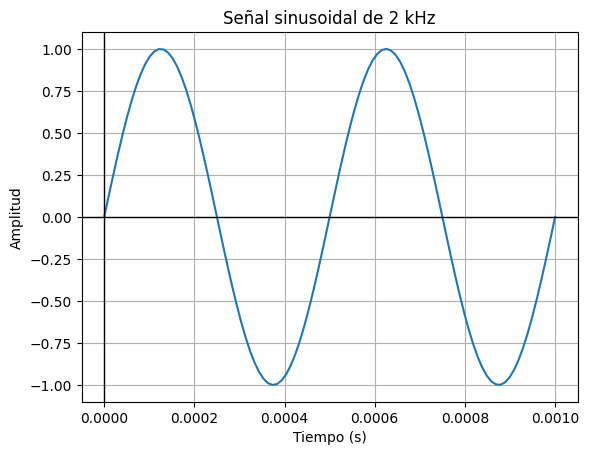

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi

#%% Punto 1 a (Grafico 2 períodos):

# Parámetros
frecuencia = 2000  # 2 KHz
amplitud = 1
duracion = 0.001  # 1 ms
tasa_muestreo = 100000  # 100 kHz, para obtener una buena resolución
    
# Generación del tiempo
t = np.linspace(0, duracion, int(tasa_muestreo * duracion), endpoint=True)
    
# Generación de la señal sinusoidal
señal = amplitud * np.sin(2 * np.pi * frecuencia * t)
    
# Graficar la señal
plt.plot(t, señal)
plt.title('Señal sinusoidal de 2 kHz')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid(True)
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.show()

### Acá se sintetiza y grafica la misma señal anterior amplificada y desfasada pi/2. De nuevo son 100000 muestras en 1 segundo. El tiempo entre muestras es de 0,00001 segundos y el número de muestras es 100.

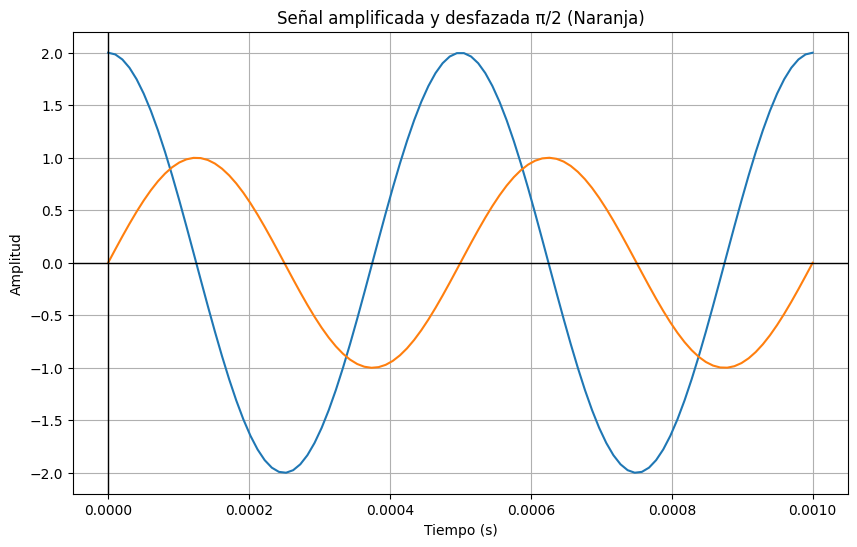

In [23]:
#%% Punto 1 b:

#Paámetros amplificación y desfasaje
fase = np.pi / 2  # Desfase de π/2 (90 grados)
amplificacion = 2  # Amplificación de la señal
    
# Señal amplificada y desfazada en π/2
señal_amplificada = amplificacion * amplitud * np.sin(2 * np.pi * frecuencia * t + fase)
    
# Graficar las señales
plt.figure(figsize=(10, 6))
    
# Señal amplificada y desfazada
plt.plot(t, señal_amplificada)
plt.plot(t, señal)
plt.title('Señal amplificada y desfazada π/2 (Naranja)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid(True)
plt.show()

### Aquí se sintetiza y grafica la primera señal modulada por otra señal sinusoidal de la mitad de su frecuencia, de nuevo son 100000 muestras en 1 segundo. El tiempo entre muestras es de 0,00001 segundos y el número de muestras es 100.

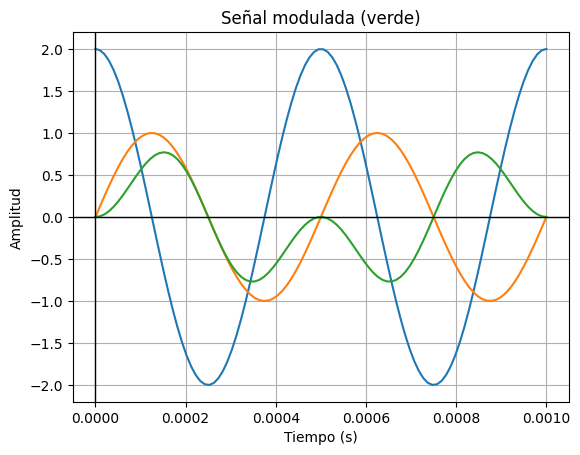

In [24]:
#%% Punto 1 c:

#Parámetros señal moduladora
frecuencia_moduladora = frecuencia/2  # Mitad de la señal original
amplitud_moduladora = 1
duracion = 0.001  # 10 ms
tasa_muestreo = 100000  # 100 kHz, para obtener una buena resolución

# Señal modulada en amplitud por una señal sinusoidal de la mitad de la frecuencia
señal_modulada = (amplitud_moduladora * np.sin(2 * np.pi * frecuencia_moduladora * t)) * señal

# Señal modulada
plt.plot(t, señal_amplificada)
plt.plot(t, señal)
plt.plot(t, señal_modulada)
plt.title('Señal modulada (verde)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid(True)
plt.show()

### Aquí se sintetiza y grafica la primera señal recortada a un 75%, de nuevo son 100000 muestras en 1 segundo. El tiempo entre muestras es de 0,00001 segundos y el número de muestras es 100.

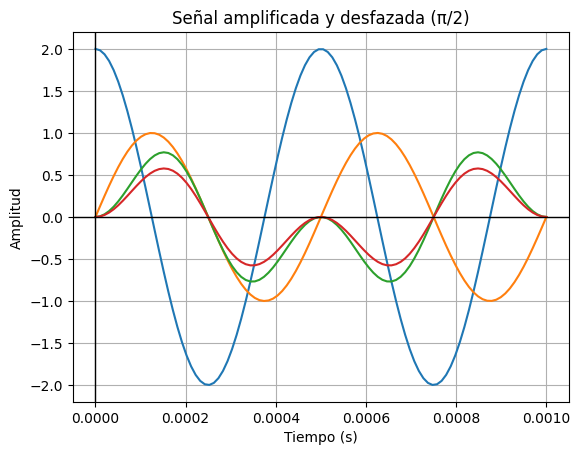

In [25]:
#%% Punto 1 d:

#Señal recortada
señal_recortada=0.75 * señal_modulada

# Señal recortada
plt.plot(t, señal_amplificada)
plt.plot(t, señal)
plt.plot(t, señal_modulada)
plt.plot(t, señal_recortada)
plt.title('Señal amplificada y desfazada (π/2)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid(True)
plt.show()

### Aquí se sintetiza y grafica una señal cuadrada de 4KHz, ahora son 1000000 de muestras en 1 segundo. El tiempo entre muestras es de 0,000001 segundos y el número de muestras es 1000. Se aumentó el número de muestras porque las líneas de los pulsos quedaban inclinadas con la cantidad de muestras de la primera señal y deberían ser rectas verticales.

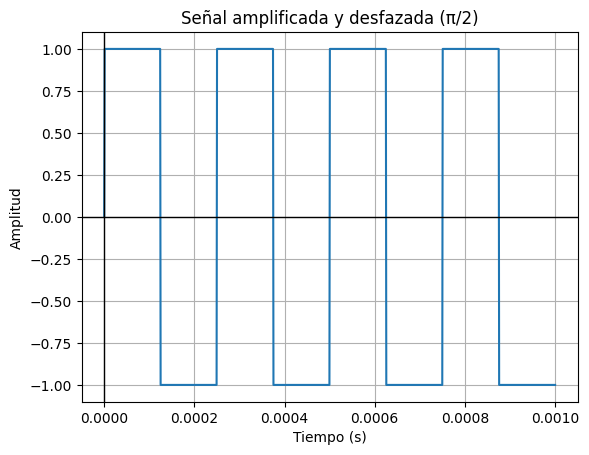

In [26]:
#%% Punto 1 e:

# Señal cuadrada de 4 kHz
frecuencia_cuadrada = 4000  # 4 KHz
tasa_muestreo_cuadrada = 1000000

# Generación del tiempo
t_cuadrada = np.linspace(0, duracion, int(tasa_muestreo_cuadrada * duracion), endpoint=True)
señal_cuadrada = amplitud * np.sign(np.sin(2 * np.pi * frecuencia_cuadrada * t_cuadrada))

#Señal cuadrada
plt.plot(t_cuadrada, señal_cuadrada)
plt.title('Señal amplificada y desfazada (π/2)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid(True)
plt.show()

### Aquí se sintetiza y grafica una señal de un pulso de 10 milisegundos, en este caso son 100000 muestras en 1 segundo. El tiempo entre muestras es de 0,0001 segundos y el número de muestras es 1500.

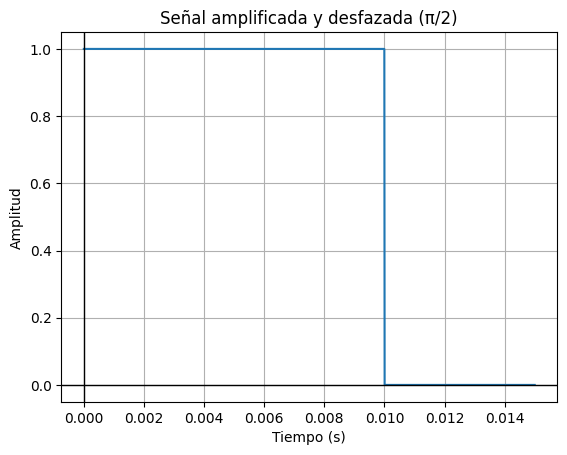

In [27]:
#%% Punto 1 f:

# Pulso rectangular de 10 ms
duracion_pulso = 0.01  # 10 ms
duracion_muestreo_pulso = 0.015
t_pulso = np.linspace(0, duracion_muestreo_pulso, int(tasa_muestreo * duracion_muestreo_pulso), endpoint=True)
señal_pulso = np.zeros_like(t_pulso)
señal_pulso[(t_pulso >= 0) & (t_pulso < duracion_pulso)] = 1  # Pulso rectangular de 10 ms

#Señal pulso de 10 ms
plt.plot(t_pulso, señal_pulso)
plt.title('Señal amplificada y desfazada (π/2)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.axhline(0, color='black', linewidth=1, linestyle='-')
plt.axvline(0, color='black', linewidth=1, linestyle='-')
plt.grid(True)
plt.show()

### Aquí se calcula la potencia de las señales periódicas y la energía de las señales no periódicas.

In [28]:
#%% Punto 1 g:

#Cálculo de potencia y energía

# Cálculo de la potencia de señales periódicas
potencia_señal = np.mean(señal**2)
potencia_señal_amplificada = np.mean(señal_amplificada**2)
potencia_señal_modulada = np.mean(señal_modulada**2)
potencia_señal_recortada = np.mean(señal_recortada**2)
potencia_cuadrada = np.mean(señal_cuadrada**2)

# Cálculo de la energía de una señal finita
energia_pulso = np.sum(señal_pulso**2)

# Mostrar los resultados
print(f"Potencia de la señal original de 2 kHz: {potencia_señal:.4f}W")
print(f"Potencia de la señal amplificada: {potencia_señal_amplificada:.4f}W")
print(f"Potencia de la señal modulada: {potencia_señal_modulada:.4f}W")
print(f"Potencia de la señal recortada: {potencia_señal:.4f}W")
print(f"Potencia de la señal cuadrada de 4 kHz: {potencia_cuadrada:.4f}W")
print(f"Energía de la señal de pulso rectangular: {energia_pulso:.4f}J")

Potencia de la señal original de 2 kHz: 0.4950W
Potencia de la señal amplificada: 2.0200W
Potencia de la señal modulada: 0.2475W
Potencia de la señal recortada: 0.4950W
Potencia de la señal cuadrada de 4 kHz: 0.9990W
Energía de la señal de pulso rectangular: 1000.0000J


### Aquí se verifica la ortogonalidad entre la primera señal generada y las demás.

In [29]:
#%% Punto 2:

#Verifico ortogonalidad:
# Producto escalar entre la señal original y la amplificada/desfazada
producto_original_modificada = np.sum(señal * señal_amplificada)

# Producto escalar entre la señal original y la modulada en amplitud
producto_original_modulada = np.sum(señal * señal_modulada)

# Producto escalar entre la señal original y la recortada
producto_original_recortada = np.sum(señal * señal_recortada)

# Producto escalar entre la señal original y la cuadrada. Como tienen distinto numero de muestras cambio el numero de muestras de la original para que coincidan
# Generación de la señal sinusoidal
señal2 = amplitud * np.sin(2 * np.pi * frecuencia * t_cuadrada)

producto_original_cuadrada = np.sum(señal2 * señal_cuadrada)

# Producto escalar entre la señal original y el pulsoComo tienen distinto numero de muestras cambio el numero de muestras de la original para que coincidan
# Generación de la señal sinusoidal
señal3 = amplitud * np.sin(2 * np.pi * frecuencia * t_pulso)
producto_original_pulso = np.sum(señal3 * señal_pulso)

# Mostrar los resultados
print(f"Producto escalar de la señal original con la amplificada/desfazada: {producto_original_modificada:.4f}")
print(f"Producto escalar de la señal original con la modulada en amplitud: {producto_original_modulada:.4f}")
print(f"Producto escalar de la señal original con la recortada: {producto_original_recortada:.4f}")
print(f"Producto escalar de la señal original con la cuadrada: {producto_original_cuadrada:.4f}")
print(f"Producto escalar de la señal original con el pulso: {producto_original_pulso:.4f}")

Producto escalar de la señal original con la amplificada/desfazada: 0.0000
Producto escalar de la señal original con la modulada en amplitud: -0.0000
Producto escalar de la señal original con la recortada: -0.0000
Producto escalar de la señal original con la cuadrada: -1.0016
Producto escalar de la señal original con el pulso: -0.0140


### Aquí se verifica la identidad trigonométrica dada.
Demostración matemática:
<img src="./DemostracionTS1.JPEG" align="center" width="700" /> 

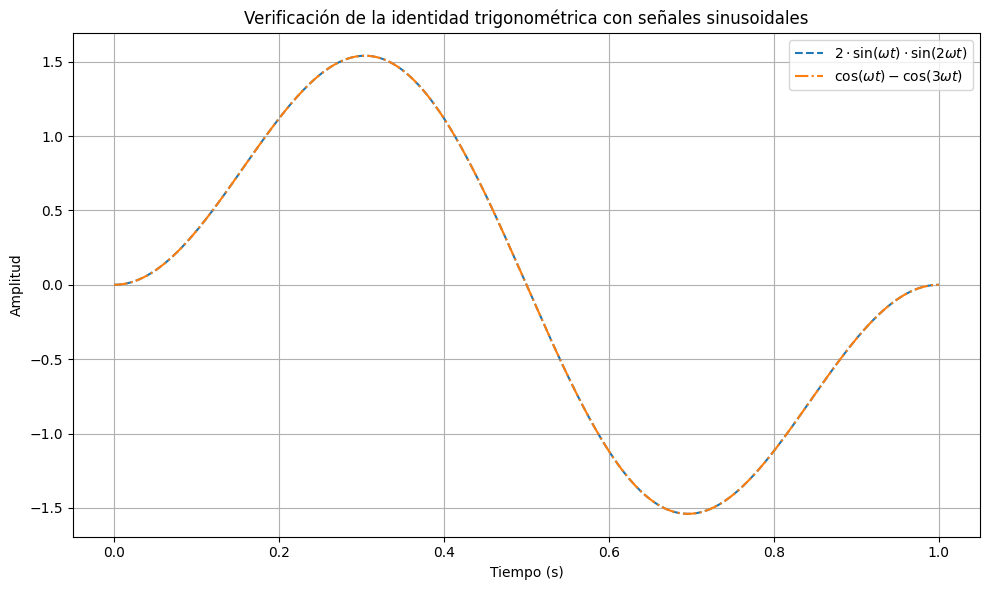

Izquierda de la igualdad:[0.00000000e+00 3.95571670e-05 1.58224756e-04 3.55991032e-04
 6.32836437e-04 9.88733592e-04 1.42364730e-03 1.93753455e-03
 2.53034452e-03 3.20201858e-03]
Derecha de la igualdad:[0.00000000e+00 3.95571670e-05 1.58224756e-04 3.55991032e-04
 6.32836437e-04 9.88733592e-04 1.42364730e-03 1.93753455e-03
 2.53034452e-03 3.20201858e-03]


In [30]:
#%% Punto 4:

# Parámetros
w = 2 * np.pi * 1  # Frecuencia angular (1 Hz para la demostración)
t = np.linspace(0, 1, 1000)  # Tiempo

# 2 * sin(2 w t) * sin(w t)
izquierda = 2 * np.sin(w * t) * np.sin(w * t/2)

# cos(omega t) - cos(3 omega t)
derecha = np.cos(w * t - w * t/2) - np.cos(w * t + w * t/2)

# Graficar las dos expresiones
plt.figure(figsize=(10, 6))
plt.plot(t, izquierda, label=r'$2 \cdot \sin(\omega t) \cdot \sin(2\omega t)$', linestyle='--')
plt.plot(t, derecha, label=r'$\cos(\omega t) - \cos(3\omega t)$', linestyle='-.')
plt.title('Verificación de la identidad trigonométrica con señales sinusoidales')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Muestro los primeros 10 valores para demostrar la igualdad
print(f"Izquierda de la igualdad:{izquierda[0:10]}")
print(f"Derecha de la igualdad:{derecha[0:10]}")

### Para terminar se realiza la autocorrelación de la primera señal y su correlación cruzada con las demás. Acá tira un error en el gráfico pero no fui capaz de solucionarlo y no tuve tiempo de consultar este punto.

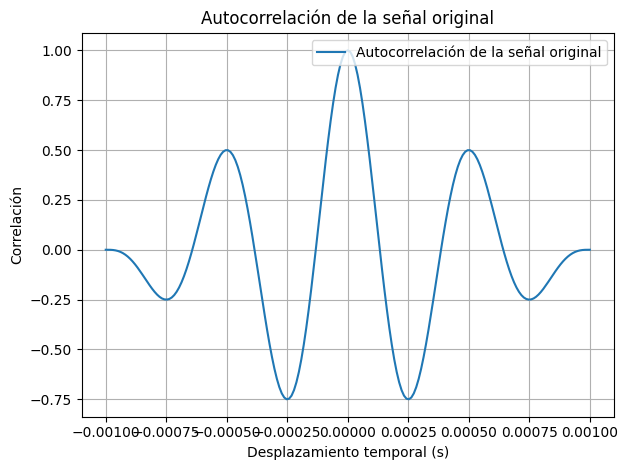

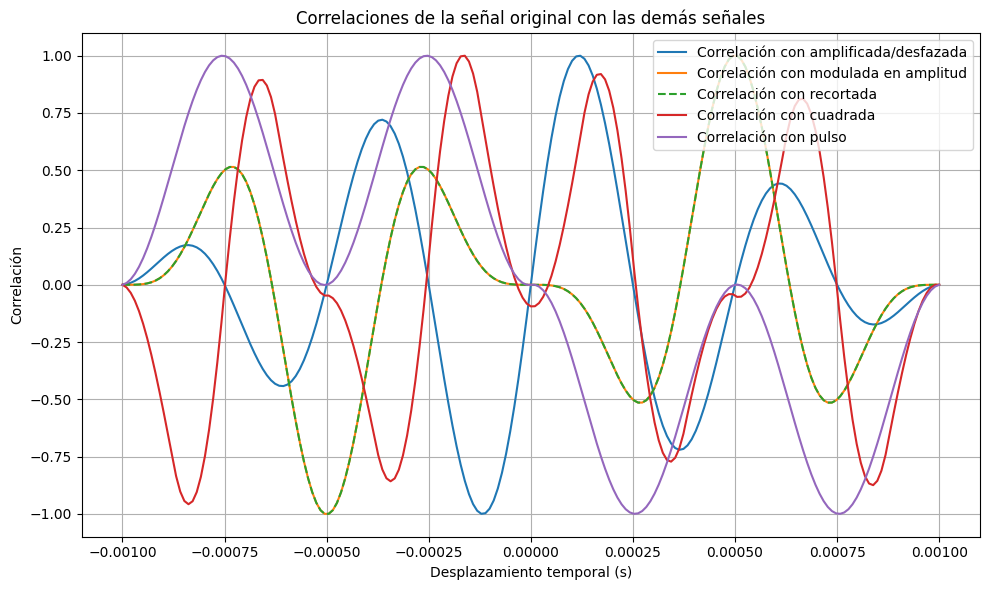

In [31]:
#%% Punto 3:

# Autocorrelación de la señal original
autocorrelacion = np.correlate(señal, señal, mode='full')
autocorrelacion = autocorrelacion / np.max(autocorrelacion)  # Normalizar a su valor máximo

# Correlación cruzada entre la señal original y las demás señales
correlacion_modificada = np.correlate(señal, señal_amplificada, mode='full')
correlacion_modulada = np.correlate(señal, señal_modulada, mode='full')
correlacion_recortada = np.correlate(señal, señal_recortada, mode='full')

t_cuadrada2 = np.linspace(0, duracion, int(100000 * duracion), endpoint=True)
señal_cuadrada2 = amplitud * np.sign(np.sin(2 * np.pi * frecuencia_cuadrada * t_cuadrada2))
correlacion_cuadrada = np.correlate(señal, señal_cuadrada2, mode='full')

t_pulso2 = np.linspace(0, duracion, int(tasa_muestreo * duracion), endpoint=True)
señal_pulso2 = np.zeros_like(t_pulso2)
señal_pulso2[(t_pulso2 >= 0) & (t_pulso2 < duracion_pulso)] = 1  # Pulso rectangular de 10 ms
correlacion_pulso = np.correlate(señal, señal_pulso2, mode='full')

# Normalizar las correlaciones cruzadas
correlacion_modificada = correlacion_modificada / np.max(np.abs(correlacion_modificada))
correlacion_modulada = correlacion_modulada / np.max(np.abs(correlacion_modulada))
correlacion_recortada = correlacion_recortada / np.max(np.abs(correlacion_recortada))
correlacion_cuadrada = correlacion_cuadrada / np.max(np.abs(correlacion_cuadrada))
correlacion_pulso = correlacion_pulso / np.max(np.abs(correlacion_pulso))

# Generar el eje temporal para las correlaciones (debe tener el mismo tamaño que las señales)
t_correlacion = np.linspace(-duracion, duracion, len(autocorrelacion))

# Autocorrelación de la señal original
plt.plot(t_correlacion, autocorrelacion, label='Autocorrelación de la señal original')

# Configuración del gráfico
plt.title('Autocorrelación de la señal original')
plt.xlabel('Desplazamiento temporal (s)')
plt.ylabel('Correlación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Graficar todas las correlaciones en un solo gráfico
plt.figure(figsize=(10, 6))

# Correlación cruzada entre la señal original y la amplificada/desfazada
plt.plot(t_correlacion, correlacion_modificada, label='Correlación con amplificada/desfazada')

# Correlación cruzada entre la señal original y la modulada en amplitud
plt.plot(t_correlacion, correlacion_modulada, label='Correlación con modulada en amplitud')

# Correlación cruzada entre la señal original y la recortada
plt.plot(t_correlacion, correlacion_recortada, label='Correlación con recortada', linestyle='--')

# Correlación cruzada entre la señal original y la cuadrada
plt.plot(t_correlacion, correlacion_cuadrada, label='Correlación con cuadrada')

# Correlación cruzada entre la señal original y el pulso
plt.plot(t_correlacion, correlacion_pulso, label='Correlación con pulso')

# Configuración del gráfico
plt.title('Correlaciones de la señal original con las demás señales')
plt.xlabel('Desplazamiento temporal (s)')
plt.ylabel('Correlación')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


En el gráfico vemos como en la autocorrelación tenemos un pico en el 0 del eje x, que es cuando no desplazo la señal. Esto tiene sentido porque estoy comparando la señal con sí misma sin desfazarla. Después se observan picos más chicos cuando me adelanto o me atraso múltiplos de un período de la señal y tengo picos negativos (de correlación negativa) si me atraso o adelanto múltiplos de la mitad del período.

Sobre las correlaciones cruzadas entre la señal original y las demás señales:
Señal sinusoidal amplificada y desfasada π/2:
- Como está desfasada π/2 rad, la correlación es baja en el retardo cero (cuando una vale máximo, la otra vale cero).
- Hay picos positivos y negativos en retardos distintos lo que muestra la relación de fase.
- La amplificación no cambia la forma de la correlación porque están normalizadas, solo escalaría la magnitud si no estuviera normalizado.

Señal modulada en amplitud y señal recortada:
- Tiene la misma correlación cruzada la señal recortada y la modulada.
- Se ven oscilaciones más complejas en la correlación.
- La envolvente de la modulación introduce variaciones en la similitud según el retardo.
- No tiene una correlación tan limpia como la sinusoidal pura porque combina portadora y moduladora.

Señal cuadrada:
- La correlación con una cuadrada genera un patrón en forma de ondas “escalonadas”.
- Aparecen picos alineados con los bordes de la señal cuadrada.
- Refleja que la cuadrada tiene componentes en todas las armónicas impares, por lo que la similitud con la seno se alterna entre positiva y negativa según el retardo.

Pulso de 10 ms:
- La correlación es prácticamente un pico central y luego cae rápido. Eso indica que la señal original y el pulso solo se parecen en la zona donde se superponen en el tiempo. Por eso se ve una forma más angosta, sin oscilaciones periódicas.